In [1]:
import sys
sys.path.append("..")

# DeepTrack - Tracking point particles

This notebook demonstrates how to track point particles.

## Setup

This code:
1. Adds the DeepTrack module to the path (only needed if the module is downloaded through git instead of installed as a package)
2. Imports all classes that are needed for this example

In [2]:
# Import all classes that are needed for this example
from DeepTrack.scatterers import PointParticle
from DeepTrack.optics import OpticalDevice
from DeepTrack.image import Image

import numpy as np
import matplotlib.pyplot as plt

## Define the optics 

To image an object we need to define the properties of the optical system. This is done using an Optics instance. The role of the Optics instance is to take a number of light sources and correctly convolve them with the pupil function.

The optics is controlled by the following parameters:

* NA: The numerical aperature

* wavelength: The wavelength of the lightsource (m)

* pixel_size: The pixel to meter conversion factor (m/px)

* mode: "coherent" or "incoherent" light emitted by the object

* ROI: Region of interest that is imaged. Useful for avoiding wrap-around effects when doing Fourier tranforms

* upscale: How far to upscale the generated pupil-function. This increases output accuracy at the expense of additional comutational power.

In [3]:
Optics = OpticalDevice(
    NA=0.7,                
    pixel_size=0.1e-6,     
    wavelength=680e-9
)

## Define the particle

The generator takes a set of features, which are rules for generating an image, and creates an Image instance.

In this case we a single object, or feature, a particle. The particle object, for instance, contain all the information needed to image a random instance of that particle. This randomization may include properties such as its position or its intensity, and is determined by input parameters.

A simple point particle, or a point source, is entirely defined by its intensity and its position.

In [4]:
particle = PointParticle(                                         
    intensity=100,
    position=(32, 16)
)

## Generate the image

Finally, we have everything needed to create an image! This is done using the class method `Generator.get`. This returns an Image object. This behaves exactly like a normal numpy ndarray, just additionally storing the properties used to generating the image as a list of dicts. More on this later

..\DeepTrack\optics.py:133: RuntimeWarning: invalid value encountered in power
  pupil = (RHO < 1) / ((1 - NA**2 / refractive_index_medium**2 * RHO)**0.25)
..\DeepTrack\optics.py:137: RuntimeWarning: invalid value encountered in sqrt
  z_shift = 2 * np.pi * refractive_index_medium/wavelength * (1 - NA**2 / refractive_index_medium**2 * RHO)**0.5 * pixel_size * defocus


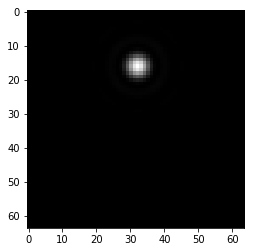

In [5]:
input_image = Image(np.zeros((64, 64)))

output_image = Optics(particle).resolve(input_image)

plt.gray()
plt.imshow(output_image)
plt.show()

## Extracting information from the image

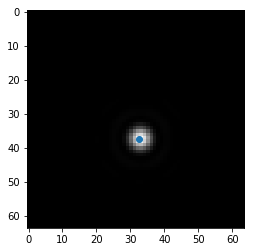

In [6]:
def get_position():
    return np.array(particle.properties["position"].current_value)

particle = PointParticle(                                         
    intensity=100,
    position=lambda: 10 + np.random.rand(2) * 44
)

input_image = Image(np.zeros((64, 64)))
output_image = Optics(particle).resolve(input_image)

position = get_position()
plt.gray()
plt.imshow(output_image)
plt.scatter(position[0], position[1])
plt.show()

In [7]:
from DeepTrack.generators import Generator
from DeepTrack.models import DeepTrackNetwork


G = Generator()

model = DeepTrackNetwork(input_shape=(64, 64, 1), number_of_outputs=2)

# Divide position by 64 to get value between 0 and 1
def get_position(image):
    return np.array(particle.properties["position"].current_value / 64)

generator = G.generate(Optics(particle), get_position, shape=(64, 64), batch_size=4)

# Validation data
batch, label = next(generator)

model.fit(
    generator,
    epochs=1000,
    steps_per_epoch=64
)




prediction = model.predict(batch)

for i in range(batch.shape[0]):
    plt.gray()
    plt.imshow(np.squeeze(batch[i]))
    plt.scatter(prediction[i,0] * 64, prediction[i,1] * 64)
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


..\DeepTrack\optics.py:133: RuntimeWarning: invalid value encountered in power
  pupil = (RHO < 1) / ((1 - NA**2 / refractive_index_medium**2 * RHO)**0.25)
..\DeepTrack\optics.py:137: RuntimeWarning: invalid value encountered in sqrt
  z_shift = 2 * np.pi * refractive_index_medium/wavelength * (1 - NA**2 / refractive_index_medium**2 * RHO)**0.5 * pixel_size * defocus


Epoch 1/1000
64/64 [==============================] - 2s 33ms/step - loss: 0.0500 - mean_squared_error: 0.0500 - mean_absolute_error: 0.1608
Epoch 2/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - mean_absolute_error: 0.0897
Epoch 3/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - mean_absolute_error: 0.0704
Epoch 4/1000
64/64 [==============================] - 1s 10ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0649
Epoch 5/1000
64/64 [==============================] - 1s 11ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0630
Epoch 6/1000
64/64 [==============================] - 1s 11ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0464
Epoch 7/1000
64/64 [==============================] - 1s 11ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0423
Epoch 8/1000


KeyboardInterrupt: 